In [2]:
#Imports
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Deze functie wordt gebruikt om inline the image te kunnen tonen
def plot_with_matlib(image):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(rgb_image)
    

# Exercise 1

Write a simple program that detects vertical edges in building.png

## Assignment 1: Use the Sobel operator to calculate the horizontal first-order derivative. Ensure you capture and visualize the negative filter response values by using appropriate datatypes.

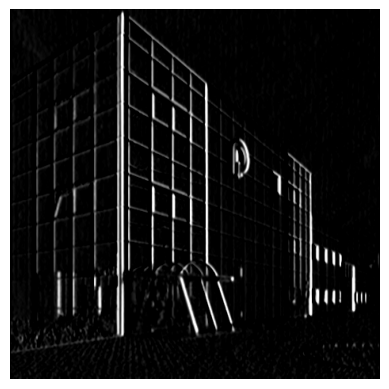

In [4]:
building = cv.imread("./Images/building.png",cv.IMREAD_GRAYSCALE)

# Calculate the horizontal derivative using the Sobel operator
blurred_image = cv.GaussianBlur(building, (5,5), 0)
sobel_horizontal = cv.Sobel(blurred_image, cv.CV_64F, 1, 0, ksize=3)
sobel_horizontal_visual = np.clip(sobel_horizontal, 0, 255).astype(np.uint8)
plot_with_matlib(sobel_horizontal_visual)


# Exercise 2
Write a simple program to create a DoG filter and detect the edges of the yellow strips in rays.png with it

## Assignment 2: Create a 15x15 DoG filter using the workflow below

- create a 1D Gaussian kernel with the function getGaussianKernel;
- copy it to the middle row of a square matrix;
- create another 1D Gaussian kernel with a smaller standard deviation;
- filter the square matrix (containing the row kernel) with this row kernel to obtain an elliptical 2D
Gaussian;
- derive this 2D Gaussian with Sobel to obtain a DoG filter;
- make a rotation matrix for a 45 degree rotation with getRotationMatrix2D;
- rotate your DoG filter with this rotation matrix (warpAffine)

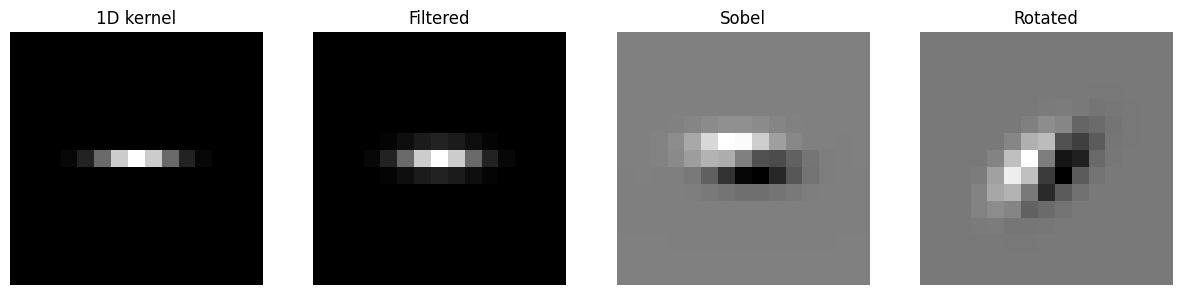

In [5]:
size = 15
sigma1 = 1.5
sigma2 = 0.5
square = np.zeros((size,size))
fig, axes = plt.subplots(1, 4, figsize=(15, 5))


kernel_1 = cv.getGaussianKernel(size,sigma1).flatten()

kernel_2 = cv.getGaussianKernel(size,sigma2)
DoG_filter = square
DoG_filter[7] = kernel_1
axes[0].imshow(DoG_filter,cmap='gray')
axes[0].set_title("1D kernel")
axes[0].axis('off')


DoG_filter = cv.filter2D(DoG_filter, -1, kernel_2)
axes[1].imshow(DoG_filter,cmap='gray')
axes[1].set_title("Filtered")
axes[1].axis('off')

sobel_x = cv.Sobel(DoG_filter, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(DoG_filter, cv.CV_64F, 0, 1, ksize=3)
DoG_filter = sobel_x + sobel_y
axes[2].imshow(DoG_filter,cmap='gray')
axes[2].set_title("Sobel")
axes[2].axis('off')

rotation_matrix = cv.getRotationMatrix2D((size/2, size/2), 45, 1)

dog_filter_rotated = cv.warpAffine(DoG_filter, rotation_matrix, (size, size))
axes[3].imshow(dog_filter_rotated,cmap='gray')
axes[3].set_title("Rotated")
axes[3].axis('off')

plt.show()

## Assignment 3: Filter rays.png with a well chosen DoG filter so that in the resulting image, the edges of the yellow strips stand out (you will need to take the absolute value of the responses).

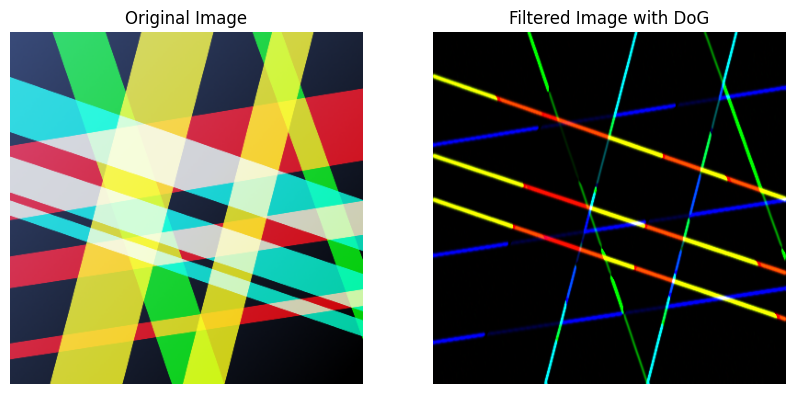

In [6]:
rays = cv.imread("./Images/rays.png")

rotation_matrix = cv.getRotationMatrix2D((size/2, size/2), 90, 1)

dog_filter_rotated = cv.warpAffine(DoG_filter, rotation_matrix, (size, size))

filtered_image = cv.filter2D(rays, -1, dog_filter_rotated)

filtered_image_abs = np.abs(filtered_image)
filtered_image_rescaled = filtered_image_abs / np.max(filtered_image_abs) - 0.5
filtered_image_rescaled += 0.5

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv.cvtColor(rays, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_rescaled, cmap='gray', vmin=0, vmax=1)
plt.title('Filtered Image with DoG')
plt.axis('off')
plt.show()

## Question 1: What happens when your filter goes ”across the border” of the image?

# Exercise 3

Write a simple program that detects all the edges in rays.png.

## Assignment 4: Apply Canny edge detection with thresholds chosen so that the edges of all strips are detected

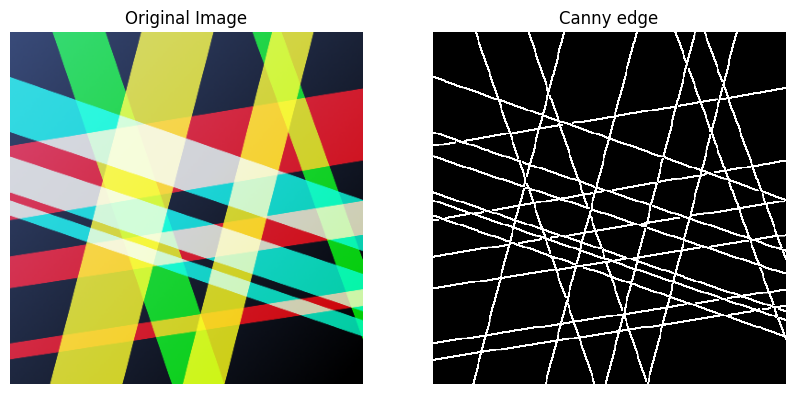

In [26]:
# Convert to grayscale
gray = cv.cvtColor(rays, cv.COLOR_BGR2GRAY)
# Apply Canny edge detection
edges = cv.Canny(gray, 10, 15)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv.cvtColor(rays, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray', vmin=0, vmax=1)
plt.title('Canny edge')
plt.axis('off')
plt.show()


# Exercise 4